In [1]:
import os
from nltk.corpus import stopwords
from nltk import word_tokenize
from string import punctuation
import random

In [2]:
s = str.maketrans('', '', punctuation)
a = 'salam!@'
a.translate(s)

'salam'

In [3]:
stop_words = stopwords.words('english')

In [4]:
negative_documents = []
max_len_negative = 0
for file in os.listdir('data/neg'):
    with open('data/neg/' + file) as f:
        text = f.read()
        tokens = word_tokenize(text)
        translator = str.maketrans('', '', punctuation)
        tokens = [w.translate(translator) for w in tokens]
        tokens = [w for w in tokens if not w in stop_words]
        if len(tokens) > max_len_negative:
            max_len_negative = len(tokens)
        negative_documents.append(' '.join(tokens))
len(negative_documents)

1000

In [5]:
max_len_negative

1400

In [6]:
positive_documents = []
max_len_positive = 0
for file in os.listdir('data/pos'):
    with open('data/pos/' + file) as f:
        text = f.read()
        tokens = word_tokenize(text)
        translator = str.maketrans('', '', punctuation)
        tokens = [w.translate(translator) for w in tokens]
        tokens = [w for w in tokens if not w in stop_words]
        if len(tokens) > max_len_positive:
            max_len_positive = len(tokens)
        positive_documents.append(' '.join(tokens))
len(positive_documents)

1000

In [7]:
max_len_positive

1693

In [8]:
max_len = max(max_len_negative, max_len_positive)

In [9]:
random.shuffle(negative_documents)
random.shuffle(positive_documents)

In [10]:
import random

X_train = negative_documents[:800] + positive_documents[:800]
y_train = [0]*800 + [1]*800
train = list(zip(X_train, y_train))
random.shuffle(train)
X_train, y_train = zip(*train)

X_test = negative_documents[800:] + positive_documents[800:]
y_test = [0]*200 + [1]*200
test = list(zip(X_test, y_test))
random.shuffle(test)
X_test, y_test = zip(*test)


In [11]:
len(X_train)

1600

In [12]:
len(y_train)

1600

In [13]:
len(X_test)

400

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Embedding, Conv1D, MaxPool1D, Dropout
from tensorflow.keras.layers import concatenate

In [15]:
max_len

1693

In [16]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [17]:
import pickle
with open('tokenizer.keras', 'wb') as f:
    pickle.dump(tokenizer, f)

In [18]:
tokenizer

In [19]:
vocab_len = len(tokenizer.word_index) + 1

In [20]:
vocab_len

40586

In [21]:
encoded = tokenizer.texts_to_sequences(X_train)

In [22]:
encoded[0]

[14966,
 4026,
 18,
 155,
 1,
 93,
 696,
 3763,
 4761,
 23747,
 1651,
 1394,
 215,
 226,
 318,
 2103,
 4027,
 6462,
 1828,
 318,
 7897,
 5241,
 678,
 119,
 437,
 16,
 627,
 420,
 23748,
 1480,
 14967,
 2057,
 3764,
 6093,
 1395,
 7361,
 2058,
 112,
 2,
 376,
 62,
 168,
 1918,
 110,
 1396,
 753,
 59,
 2945,
 132,
 1371,
 11345,
 170,
 906,
 2874,
 173,
 873,
 211,
 23749,
 4566,
 14968,
 4984,
 23750,
 23751,
 391,
 233,
 505,
 8498,
 7362,
 5242,
 94,
 113,
 318,
 6869,
 310,
 421,
 6093,
 408,
 13,
 722,
 23752,
 181,
 4567,
 132,
 1622,
 805,
 3108,
 1397,
 1774,
 6463,
 23753,
 14969,
 198,
 61,
 2236,
 1775,
 3532,
 226,
 262,
 11346,
 4762,
 2237,
 23754,
 6870,
 1858,
 10193,
 96,
 358,
 11347,
 5520,
 14970,
 9249,
 2579,
 25,
 197,
 2237,
 9250,
 274,
 23755,
 23756,
 5,
 11348,
 6871,
 14,
 409,
 2359,
 697,
 6094,
 4,
 2516,
 3109,
 168,
 2716,
 598,
 4177,
 1441,
 5790,
 1623,
 7363,
 7898,
 3110,
 74,
 4178,
 2799,
 583,
 1859,
 226,
 3220,
 46,
 3425,
 2717,
 5243,
 53,
 2

In [23]:
padded = pad_sequences(encoded, maxlen=max_len, padding='post')

In [24]:
padded.shape

(1600, 1693)

In [25]:
input1 = Input(shape=(max_len,))
embedding1 = Embedding(vocab_len, 100)(input1)
conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
drop1 = Dropout(0.5)(conv1)
pool1 = MaxPool1D(pool_size=2)(drop1)
flat1 = Flatten()(pool1)

input2 = Input(shape=(max_len,))
embedding2 = Embedding(vocab_len, 100)(input2)
conv2 = Conv1D(filters=32, kernel_size=6, activation='relu')(embedding2)
drop2 = Dropout(0.5)(conv2)
pool2 = MaxPool1D(pool_size=2)(drop2)
flat2= Flatten()(pool2)

input3 = Input(shape=(max_len,))
embedding3 = Embedding(vocab_len, 100)(input3)
conv3 = Conv1D(filters=32, kernel_size=8, activation='relu')(embedding3)
drop3 = Dropout(0.5)(conv3)
pool3 = MaxPool1D(pool_size=2)(drop3)
flat3 = Flatten()(pool3)

input4 = Input(shape=(max_len,))
embedding4 = Embedding(vocab_len, 100)(input4)
conv4 = Conv1D(filters=32, kernel_size=10, activation='relu')(embedding4)
drop4 = Dropout(0.5)(conv4)
pool4 = MaxPool1D(pool_size=2)(drop4)
flat4 = Flatten()(pool4)

conc = concatenate([flat1, flat2, flat3, flat4])

dense1 = Dense(10, activation='relu')(conc)
output = Dense(1, activation='sigmoid')(dense1)

In [26]:
model = Model(inputs=[input1, input2, input3, input4], outputs=output)

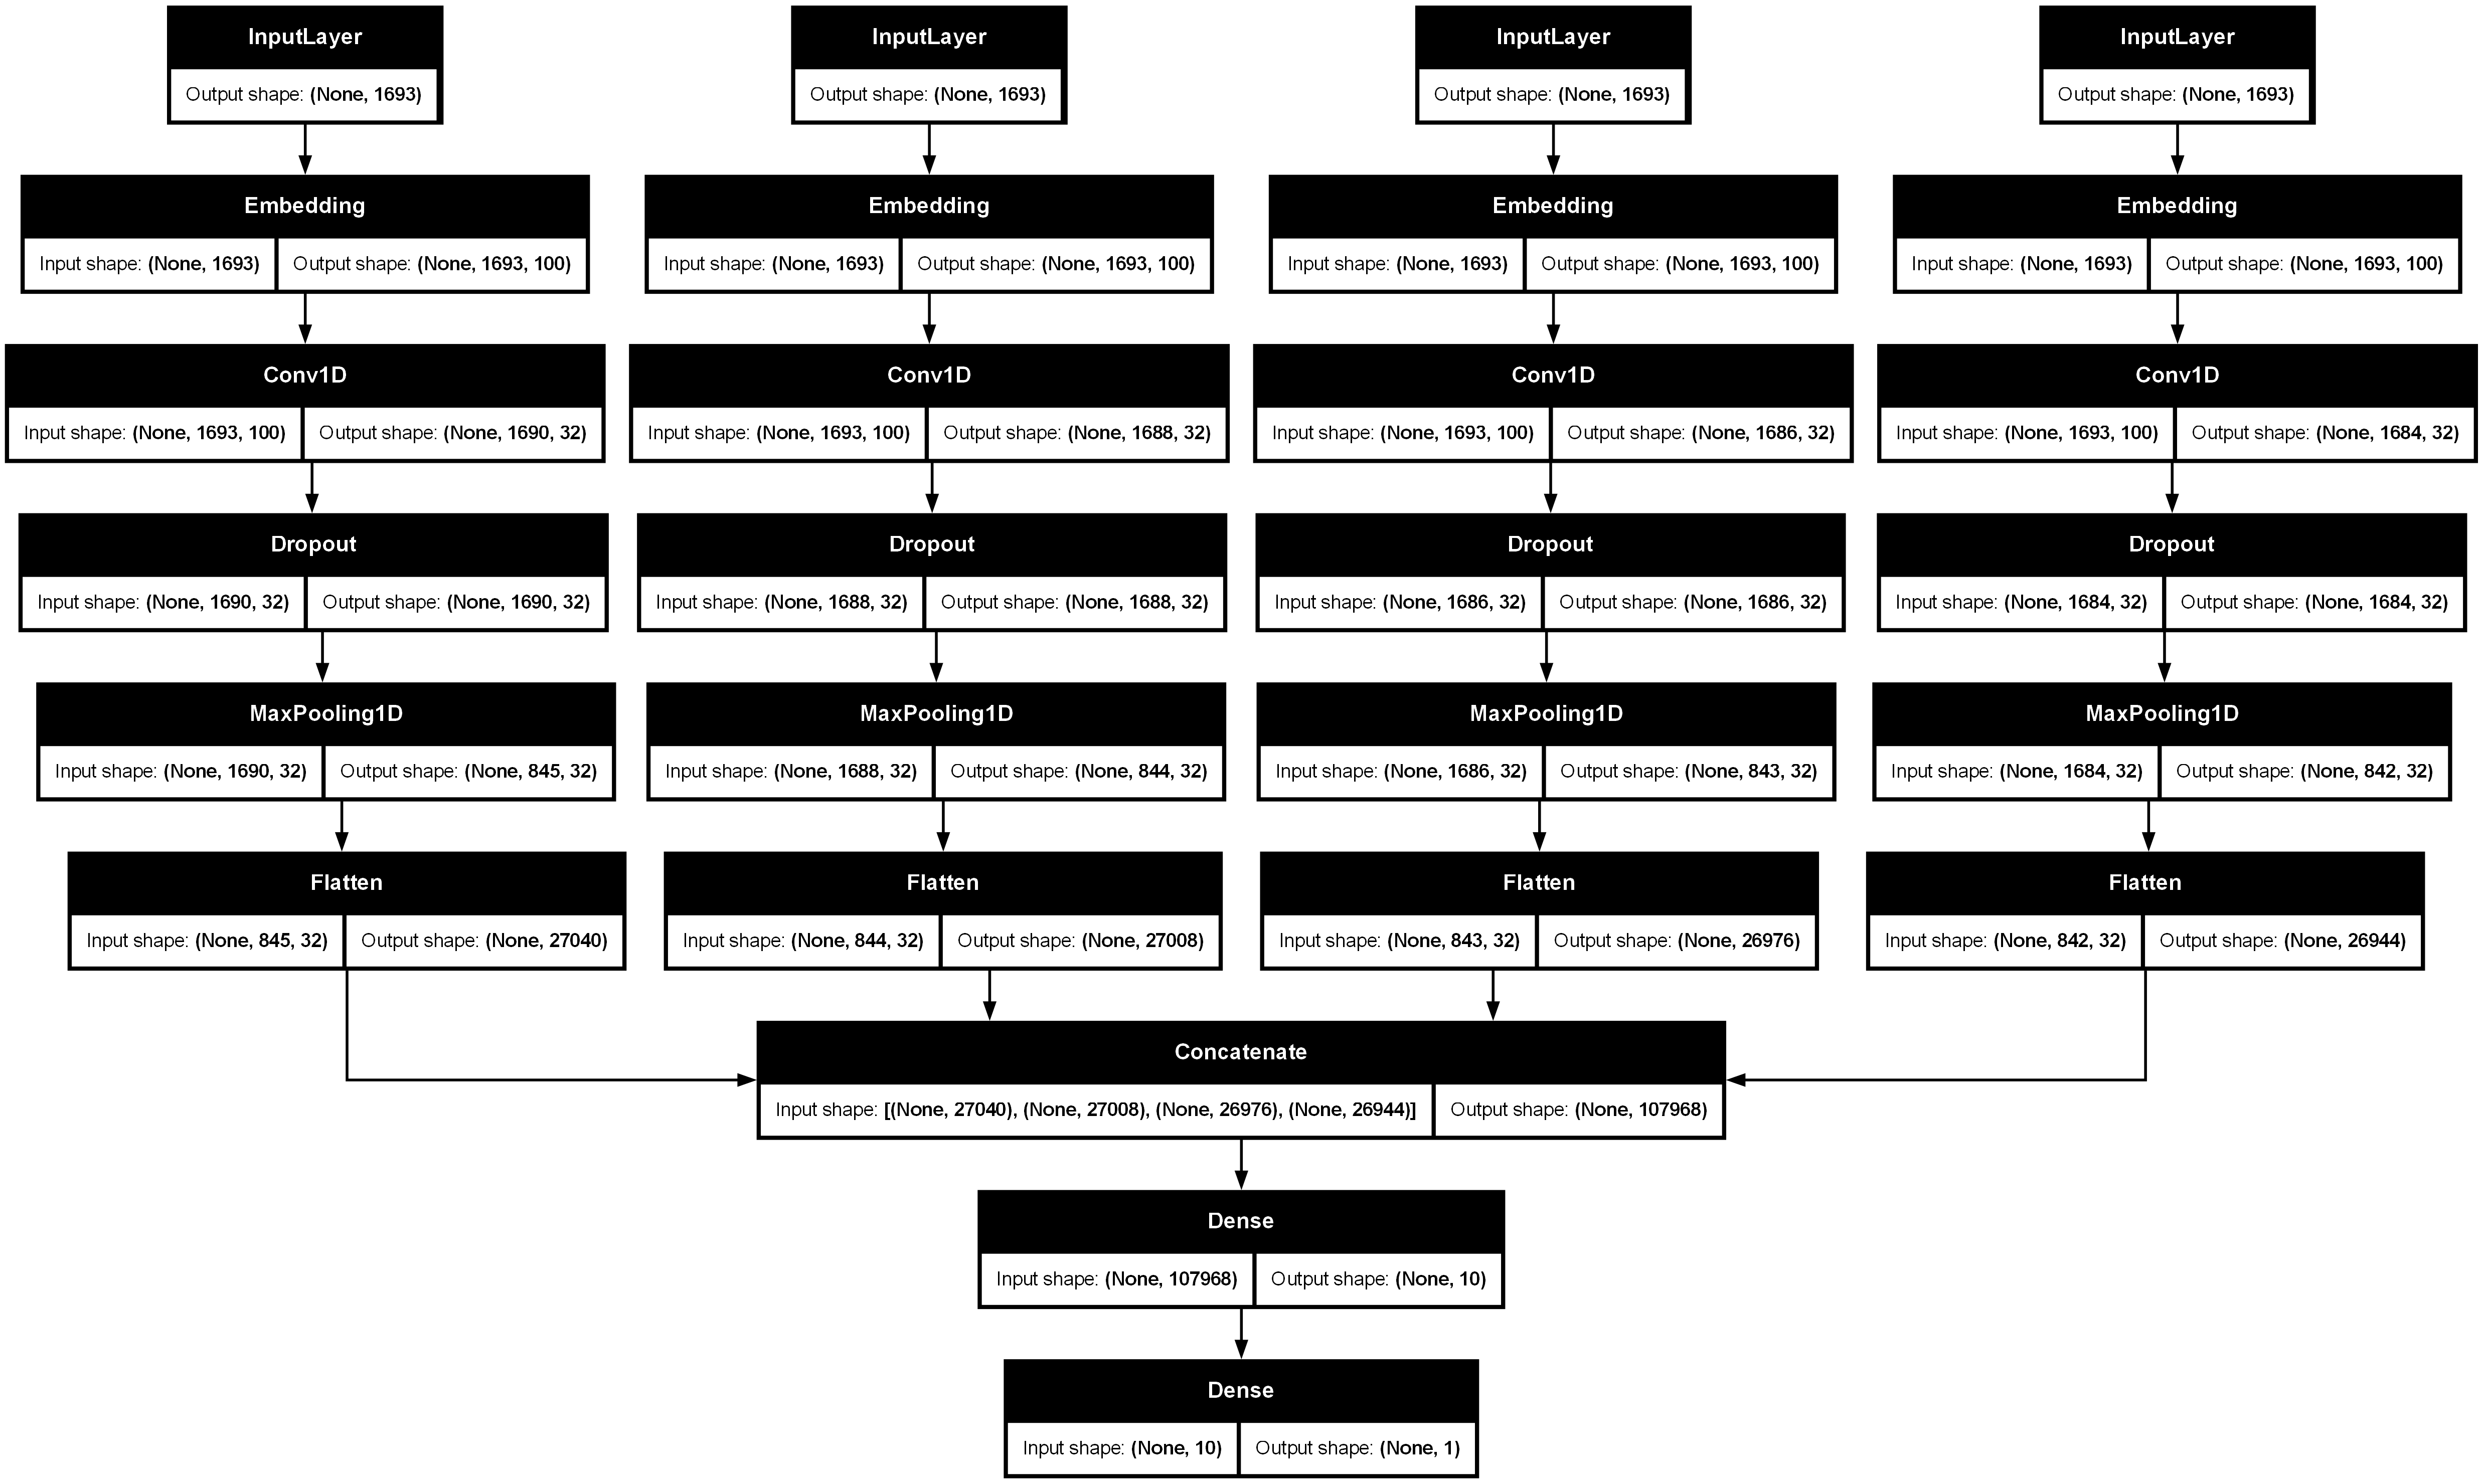

In [27]:
plot_model(model, show_shapes=True)

In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 1693)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 1693)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 1693)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 1693)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 1693, 100) │  4,058,600 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 1693, 100) │  4,058,600 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 1693, 100) │  4,058,600 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, 1693, 100) │  4,058,600 │ input_layer_3[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 1690, 32)  │     12,832 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 1688, 32)  │     19,232 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 1686, 32)  │     25,632 │ embedding_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 1684, 32)  │     32,032 │ embedding_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 1690, 32)  │          0 │ conv1d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 1688, 32)  │          0 │ conv1d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 1686, 32)  │          0 │ conv1d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 1684, 32)  │          0 │ conv1d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 845, 32)   │          0 │ dropout[0][0]     │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 844, 32)   │          0 │ dropout_1[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_2     │ (None, 843, 32)   │          0 │ dropout_2[0][0]   │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 17,403,829 (66.39 MB)

 Trainable params: 17,403,829 (66.39 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
encoded_test = tokenizer.texts_to_sequences(X_test)
padded_test = pad_sequences(encoded_test, maxlen=max_len, padding='post')

In [31]:
padded_test.shape

(400, 1693)

In [32]:
import numpy as np

In [33]:
model.fit([padded, padded, padded, padded], np.array(y_train), epochs=10, batch_size=20, validation_data=([padded_test, padded_test, padded_test, padded_test], np.array(y_test)))

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 95ms/step - accuracy: 0.4994 - loss: 0.7006 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.4875 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - accuracy: 0.4725 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.5200 - loss: 0.6903 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.6825 - loss: 0.6034 - val_accuracy: 0.7400 - val_loss: 0.6172
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - accuracy: 0.8888 - loss: 0.4237 - val_accuracy: 0.7400 - val_loss: 0.5962
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - accuracy: 0.9450 - loss: 0.2974 - val_accuracy: 0.7875 - val_loss: 0.4780
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.9737 - loss: 0.0811 - val_accuracy: 0.8550 - v

In [38]:
model.save('textcnnmultich.keras')

In [39]:
from tensorflow.keras.models import load_model

In [40]:
model = load_model('textcnnmultich.keras')

c:\Users\salim\Desktop\ProgramingProjects\DataMining\mlenv\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [41]:
with open('tokenizer.keras', 'rb') as f:
    tokenizer = pickle.load(f)

In [42]:
tokenizer.word_index

{'film': 1,
 'nt': 2,
 'movie': 3,
 'one': 4,
 'like': 5,
 'even': 6,
 'good': 7,
 'time': 8,
 'would': 9,
 'story': 10,
 'much': 11,
 'character': 12,
 'get': 13,
 'also': 14,
 'characters': 15,
 'two': 16,
 'way': 17,
 'first': 18,
 'see': 19,
 'well': 20,
 'could': 21,
 'really': 22,
 'make': 23,
 'films': 24,
 'little': 25,
 'life': 26,
 'people': 27,
 'plot': 28,
 'never': 29,
 'scene': 30,
 'man': 31,
 'bad': 32,
 'best': 33,
 'new': 34,
 'know': 35,
 'many': 36,
 'scenes': 37,
 'movies': 38,
 'great': 39,
 'another': 40,
 'director': 41,
 'end': 42,
 'action': 43,
 'love': 44,
 'us': 45,
 'go': 46,
 'something': 47,
 'back': 48,
 'world': 49,
 'still': 50,
 'work': 51,
 'seems': 52,
 'made': 53,
 'though': 54,
 'big': 55,
 'makes': 56,
 'every': 57,
 'however': 58,
 'better': 59,
 'audience': 60,
 'going': 61,
 'enough': 62,
 'around': 63,
 'take': 64,
 'seen': 65,
 'may': 66,
 'last': 67,
 'think': 68,
 'actually': 69,
 'gets': 70,
 'performance': 71,
 'role': 72,
 'things': 73

In [43]:
txt = '''
boy , what a great movie ! ! 
keanu reeves and morgan freeman acting together , the director of the fugitive ( andrew davis ) back again to give us another thriller , and the beautiful rachel stealing beauty weisz thrown in to boot . 
how could this not be a blockbuster ? 
all die-hard keanu reeves fans , read on . 
ol " much ado about nothing " plays eddie kasalivich , a machinist studying at the university of chicago . 
to help pay for the rent , he takes on this job making the machinery for a hydrogen project being conducted by the university . 
by happy coincidence , he also happens to stumble on the solution to the final problem and thus is the only one who knows the key to performing this feat of miracle physics . 
this project holds great promise : taking hydrogen from water and giving out more energy than is put in . 
a potential solution to the earth's energy problems without the pollution cost . 
surely nobody could have any problems with that ? 
morgan freeman is paul shannon , the project's sponsor . 
he works for a very powerful organization that disagrees with the paternal project leader as to how quickly technology should be released to the public . 
he figures the world will disintegrate into anarchy if the results of the project are released too quickly . 
so he murders the project leader , blows up the project ( great but short scene here , sort of like a mini id4 city-devastation thing ) and tries to simulate the experiment at some other hi-tech hush-hush location . 
unfortunately , our intrepid machinist and an english physicist ( weisz ) manage to get away and now follows a fugitive-like chase using a not too dissimilar rehash of that movie script . 
this movie is just dying for a comparison with " the fugitive " . 
both movies use chicago as the main city and since the place doesn't change much , i guess we can't really blame the setting for the paucity of atmosphere . 
the trouble here is that where the fugitive had harrison ford and tommy lee jones , chain reaction only has keanu reeves and fred ward . 
credit to them , but we aren't really given much of a chance to empathise with the characters . 
where ford was able to work within the confines of the movie to evoke sympathy , eddie kasalivich just doesn9t seem very believeable and reeves' character is never given the time to develop . 
it might have been a better investment in film to give the characters more depth and spend less time on the chase sequences , which frankly , get quite boring after a while . 
harrison ford was " the man against the world . " 
he was alone in a world where he didn't know who to trust and it came across real well . 
in chain reaction , keanu reeves isn't alone . 
now that would be fine if the fleeing couple had some chemistry and could really portray some paranoia , vulnerability and confusion . 
we don't get this . 
we get him thinking he's still in speed , only now our sandra bullock has an english accent , probably doesn't drive a bus , and hardly contributes anything to the movie . 
the producers here probably thought , " hey , what if keanu and rachel don't hit it off too well ? 
let's rope in that morgan to help us out . " 
well , keanu and rachel didn't hit it off well on the screen , and most unfortunately , morgan freeman doesn't help much either . 
the only thing we come to really know of paul shannon is that he always has a full load of cigars in his cigar holder . 
it's not really his fault . 
once again , andrew davis just doesn't take the time to build his characters . 
someone must have convinced him that this time round , cinema dollars are best earned by making the movie run like a headless chicken . 
the flying inkpot rating system : * wait for the tv2 broadcast . 
 * * a little creaky , but still better than staying at home with gotcha ! 
 * * * pretty good , bring a friend . 
 * * * * amazing , potent stuff . 
 * * * * * perfection . 
see it twice . 
'''

In [44]:
encoded_txt = tokenizer.texts_to_sequences([txt])
padded_txt = pad_sequences(encoded_txt, maxlen=max_len, padding='post')

In [45]:
padded_txt.shape

(1, 1693)

In [46]:
model.predict([padded_txt, padded_txt, padded_txt, padded_txt])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


array([[0.00435456]], dtype=float32)

In [47]:
model.predict([padded_txt, padded_txt, padded_txt, padded_txt])[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


np.float32(0.0043545645)

In [48]:
if (model.predict([padded_txt, padded_txt, padded_txt, padded_txt])[0][0] < 0.5):
    print('negative')
else:
    print('positive')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
negative
